#### #### README
 - **Topic: Employee Churn Prediction Modeling**
 - **This document: Modeling / Reusable codes**
 - **Previous document: [FINAL]EDA.ipynb**

## ## Settings

#### Display

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#### Packages

In [2]:
import math
import time
from datetime import datetime
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

import warnings
import missingno as msno
from pandasql import sqldf

from scipy import stats
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_error, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, scale
from sklearn.svm import SVC 
from sklearn_pandas import DataFrameMapper, gen_features, cross_validation
from sklearn import model_selection
from sklearn.decomposition import PCA
# from sklearn.cross_decomposition import PLSRegression, PLSSVD

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
pd.set_option('display.max_colwidth', -1)  
pd.options.display.max_columns = 100 
pd.options.display.max_rows = 1000 
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus']=False
plt.style.use('ggplot')   # fivethirtyeight
psd = lambda q: sqldf(q, gloabls())
py.init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')

D:\NUS MSBA COURSE\DBA5106 - Foundations in Business Analytics\venv_5106\venv_5106\lib\site-packages\ipykernel_launcher.py:37: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



## ## Data Overview

In [3]:
d_orig = pd.read_csv('../data/employee_attrition_ibm_data.csv', index_col='EmployeeNumber')
d = d_orig.copy()
display(d.shape, d.head(2))

(1470, 34)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


#### null check and peek

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [5]:
d.describe(include='all')   

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


#### target variable

In [6]:
d.Attrition.value_counts()

No     1233
Yes    237 
Name: Attrition, dtype: int64

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


No     1233
Yes    237 
Name: Attrition, dtype: int64


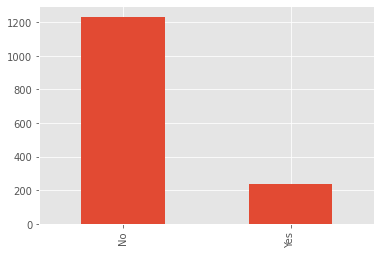

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


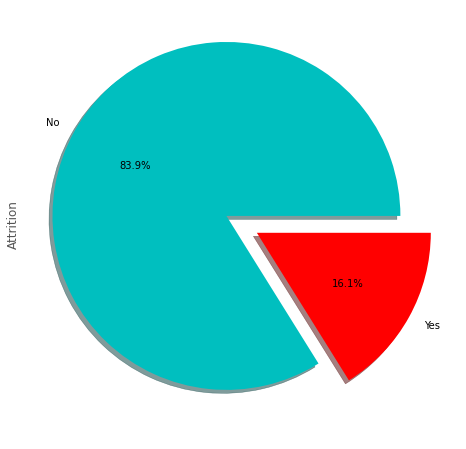

In [7]:
d.Attrition.value_counts().plot(kind='bar')
plt.figure(figsize=(20,8))
d['Attrition'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['c','r'])
print(d['Attrition'].value_counts())

# ## Basic Common Processing

In [8]:
# Reassign target
d.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)

# Make Employee Number Index -- done during read_csv ~~  no need here
# d = d.set_index('EmployeeNumber')

# Find & Delete the useless features
li_useless_feat = []
for col in list(d.columns):
    if d[col].nunique() == 1:
        li_useless_feat.append(col)
print('Useless Features:{}'.format(li_useless_feat))
d.drop(columns=li_useless_feat, inplace=True)

# generation-related functions
def age_to_born_yyyy(x):
    return 2015 - x
def cat_generation(x):
    if (x>=1940) & (x<=1959):
        return 'gen_baby_boomer'
    elif (x>=1960) & (x<=1979):
        return 'gen_x'
    elif (x>=1980) & (x<=1994):
        return 'gen_y'
    elif (x>=1995) & (x<=2010):
        return 'gen_z'
    else:
        return 'gen_alpha'        

# Add generation-related columns
d['born_yyyy'] = d.Age.apply(age_to_born_yyyy)
d['generation'] = d.born_yyyy.apply(cat_generation)

# separate the dataframe regarding generations
d_x = pd.read_csv('../data/gen_x_data.csv')
d_y = pd.read_csv('../data/gen_y_data.csv')
d_z = pd.read_csv('../data/gen_z_data.csv')
print(d.shape)
d.head(2)

Useless Features:['EmployeeCount', 'Over18', 'StandardHours']
(1470, 33)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,born_yyyy,generation
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,1974,gen_x
2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1966,gen_x


# ## Prediction / Modeling

#### Correlation between Attrtion and Features

In [9]:
corr = d.corr()
corr.sort_values(by='Attrition').style.background_gradient(cmap='coolwarm')

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,born_yyyy
TotalWorkingYears,0.680381,-0.171063,0.014515,0.004628,0.148280,-0.002693,-0.002334,-0.005533,0.782208,-0.020185,0.772893,0.026442,0.237639,-0.020608,0.006744,0.024054,0.010136,1.000000,-0.035662,0.001008,0.628133,0.460365,0.404858,0.459188,-0.680381
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.509604
YearsInCurrentRole,0.212901,-0.160545,0.009932,0.018845,0.060236,0.018007,-0.024106,0.008717,0.389447,-0.002305,0.363818,-0.012815,-0.090754,-0.001520,0.034986,-0.015123,0.050818,0.460365,-0.005738,0.049856,0.758754,1.000000,0.548056,0.714365,-0.212901
MonthlyIncome,0.497855,-0.159840,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,-0.027269,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079,-0.497855
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-1.000000
YearsWithCurrManager,0.202089,-0.156199,-0.026363,0.014406,0.069065,-0.004999,-0.020123,0.025976,0.375281,-0.027656,0.344079,-0.036746,-0.110319,-0.011985,0.022827,-0.000867,0.024698,0.459188,-0.004096,0.002759,0.769212,0.714365,0.510224,1.000000,-0.202089
StockOptionLevel,0.037510,-0.137145,0.042143,0.044872,0.018422,0.003432,0.050263,0.021523,0.013984,0.010690,0.005408,-0.034323,0.030075,0.007528,0.003506,-0.045952,1.000000,0.010136,0.011274,0.004129,0.015058,0.050818,0.014352,0.024698,-0.037510
YearsAtCompany,0.311309,-0.134392,-0.034055,0.009508,0.069114,0.001458,-0.019582,-0.021355,0.534739,-0.003803,0.514285,-0.023655,-0.118421,-0.035991,0.003435,0.019367,0.015058,0.628133,0.003569,0.012089,1.000000,0.758754,0.618409,0.769212,-0.311309
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.029820
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,0.004892


**Interpretations:**

**Reasonable**
- Age: -0.15 ~ With increase in age less likely to attrition ~ which is reasonable
- DailyRate: -0.0056 ~ With increase in DailyRate attrition decreases ~ which is reasonable
- DistanceFromHome: 0.077 ~ With increase in DistanceFromHome attrition is more likely ~ which is reasonable
- Education: -0.031 ~ With higher level of education, attrition becomes less likely ~ which is reasonable
- EnvironmentSatisfaction: -0.103 ~ With higher level of EnvironmentSatisfaction, attrition becomes less likely ~ which is reasonable
- HourlyRate

**Interesting**
- NumCompaniesWorked : 0.043494 ~ With increase in NumCompaniesWorked, more likely to attrition --> reflects tendency to switch more jobs
- 

**Unreasonable**
- MonthlyRate: 0.0151 ~ With increase in MonthlyRate attrition is more likely ~ This is unreasonable ~ with increase in monthly rate attrtition should be less likely so corr() should be -ve
- PerformanceRating: 0.00288 ~ With increase in PerformanceRating attrition is more likely ~ could be from employee's perspective they tend to leave if they are performing well for better paying jobs 

## Encoding Categorical Variables as per ordinal and nomial meaning


In [10]:
d.select_dtypes(include='object').columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'generation'],
      dtype='object')

In [11]:
ordinal_categorical = ['OverTime']
# Department, generation, BusinessTravel can be considered for ordinal_categorical on the basis of which departments have more attrition from department vs Attrtion visualisation plots

feature_map = gen_features(columns= ordinal_categorical, classes=[LabelEncoder])
mapping = DataFrameMapper(feature_map)
d[ordinal_categorical] = mapping.fit_transform(d)
print(d.shape)
d.head(3)

(1470, 33)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,born_yyyy,generation
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,1974,gen_x
2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1966,gen_x
4,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,1978,gen_x


In [12]:
# Encode the nominal_categorical using dummies so that scikit-learn can read them
nominal_categorical = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'generation']
d_dummies = d.copy()
for col in nominal_categorical:
    freqs = d_dummies[col].value_counts()
    k = freqs.index[freqs>20][:-1]                 # does the work of One Hot Encoding
    for cat in k:
        name = col+'_'+cat
        d_dummies[name] = (d_dummies[col] == cat).astype(int)
    del d_dummies[col]
    print(col)

# dummies = pd.get_dummies(d[nominal_categorical])
# print(dummies.shape)


# Drop the column with the independent variable Attrtion, non-impacting variable EmployeeNumber and columns for which we have created dummy variables
# d_dummies = pd.concat([d.drop(nominal_categorical, axis=1), dummies], axis=1)
print(d_dummies.shape)
d_dummies.head(2)

BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
generation
(1470, 49)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,born_yyyy,BusinessTravel_Travel_Rarely,BusinessTravel_Travel_Frequently,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Medical,EducationField_Marketing,EducationField_Technical Degree,EducationField_Other,Gender_Male,JobRole_Sales Executive,JobRole_Research Scientist,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single,generation_gen_y,generation_gen_x,generation_gen_baby_boomer
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,1974,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
2,49,0,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1966,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0


## NOTES on PCR
PCA + Regression/Classification = PCR

Principle Component Regression (PCR) is an algorithm for reducing the multi-collinearity of a dataset. The problem we face in multi-variate linear regression (linear regression with a large number of features) is that although it may appear that we do fit the model well, there is normally a high-variance problem on the test set.
PCR is basically using PCA, and then performing Linear Regression on these new PCs.

Bias-Variance Tradeoff
In order to prevent this degree of overfitting, PCR aims to add a slight bias, such that we are now aiming to fit the model with a slightly less training accuracy, but aim to reduce the variance to a large extent. PCR aims to achieve something very similar to what Ridge Regression tries to do. Both of these methods try to reduce overfitting, but differ in their approach

Methodology:

The key idea of how PCR aims to do this, is to use PCA on the dataset before regression.
In PCR instead of regressing the dependent variable on the independent variables directly, the principal components of the independent variables are used.


It is NOT a feature selection method, as a feature selection method would involve selecting a few features as it is, out of all of them. Instead, we are combining features to create new PCs, which are different from the original features.
PCR is particularly useful on datasets facing the problem of multi-collinearity
On datasets with highly correlated features, or even collinear features, PCR is quite useful
PCR reduces the problem of overfitting

Check for multicollinearity - google

John is looking for a Feature Selection algorithm, whereas PCR is used for Dimensionality Reduction. PCR will combine features and form new ones, but John wants to merely pick 10 of the existing 20.

**Defining PCA object ~ What's scale for?**
- pca.fit_transform(scale(X)): This tells Python that each of the predictor variables should be scaled to have a mean of 0 and a standard deviation of 1. This ensures that no predictor variable is overly influential in the model if it happens to be measured in different units

In [13]:
# Defining y and X for basic PCA() Estimation
y = d_dummies.Attrition

# Drop the column with the independent variable Attrtion, non-impacting variable EmployeeNumber and columns for which we have created dummy variables
# X = d_dummies.drop(low_corr_cols, axis=1)
X = d_dummies.drop(['Attrition'], axis=1)
print(X.shape)
# len(X) = 34 - 7 + - 2 + 30 = 55 
X.head(2)

(1470, 48)


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,born_yyyy,BusinessTravel_Travel_Rarely,BusinessTravel_Travel_Frequently,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Medical,EducationField_Marketing,EducationField_Technical Degree,EducationField_Other,Gender_Male,JobRole_Sales Executive,JobRole_Research Scientist,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single,generation_gen_y,generation_gen_x,generation_gen_baby_boomer
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,1974,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
2,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1966,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0


[83.88]
1 83.88
2 83.88
3 83.88
4 84.69
5 84.56
6 84.76
7 84.76
8 84.69
9 84.76
10 84.29
11 84.49
12 84.49
13 84.42
14 84.42
15 84.9
16 84.56
17 85.85
18 85.99
19 85.58
20 86.19
21 86.12
22 86.8
23 86.6
24 87.01
25 86.94
26 86.94
27 86.73
28 86.53
29 87.21
30 88.03
31 87.69
32 88.03
33 88.44
34 88.37
35 88.37
36 88.3
37 88.5
38 88.37
39 88.37
40 88.37
41 88.1
42 87.82
43 87.82
44 87.76
45 87.96
46 87.96


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


47 88.03


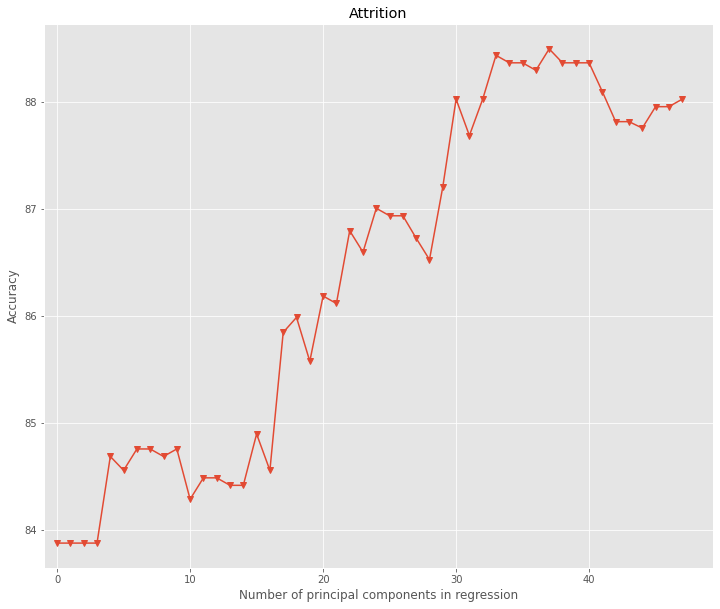

In [14]:
# Check the number of PC's to use during training by classifying the PC's on entire dataset
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

logR = LogisticRegression(random_state=0)
cv_acc_results = []

# Calculate Accuracy with only the intercept (no principal components in Log regression)
score = model_selection.cross_val_score(logR, np.ones((n,1)), y, cv = kf_10, scoring='accuracy')
cv_acc_results.append(round(score.mean()*100, 2))
print(cv_acc_results)

# Calculate Accuracy using CV for the all principle components, adding one component at the time.
for i in np.arange(1, len(X.columns)):
    score = model_selection.cross_val_score(logR, X_reduced[:,:i], y, cv=kf_10, scoring='accuracy').mean()
    cv_acc_results.append(round(score.mean()*100, 2))
    print(i, cv_acc_results[i])
    # check when results start to exceed 88% what is the number of PCs or n_components
    # We will use this n_components in training and test models
    
# Plot results 
plt.figure(figsize=(12,10))
plt.plot(cv_acc_results, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('Accuracy')
plt.title('Attrition')
plt.xlim(xmin=-1);

# pd.DataFrame(pca.components_.T)

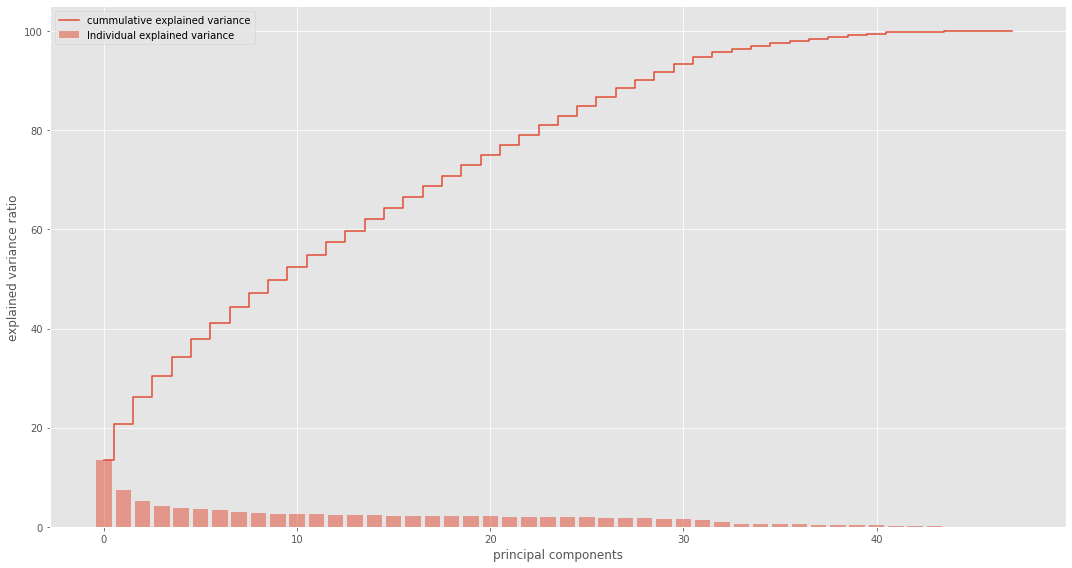

In [15]:
var_exp = np.round(pca.explained_variance_ratio_, decimals=4)*100
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize=(15,8))
plt.bar(range(X.shape[1]),var_exp,alpha=0.5,align='center',label='Individual explained variance')
plt.step(range(X.shape[1]),cum_var_exp,where='mid',label='cummulative explained variance')
plt.ylabel("explained variance ratio")
plt.xlabel("principal components")
plt.legend(loc='best')
plt.tight_layout()
plt.show()
# notice explanatory ratio from 90-95% around 32-35 : we can choose any dimension between this

In [16]:
# Split into training and test sets
X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X.shape)
print(y.shape)

(1029, 48)
(441, 48)
(1029,)
(441,)
(1470, 48)
(1470,)


In [17]:
y_train.value_counts()

0    863
1    166
Name: Attrition, dtype: int64

In [18]:
y_test.value_counts()

0    370
1    71 
Name: Attrition, dtype: int64

(1029, 48) (1029, 48)
[83.87]
1 83.87
2 83.87
3 83.87
4 84.74
5 84.84
6 84.74
7 84.84
8 84.84
9 84.84
10 84.74
11 84.84
12 84.94
13 84.74
14 85.13
15 85.13
16 85.03
17 85.03
18 84.93
19 84.94
20 86.98
21 86.79
22 86.69
23 86.59
24 87.07
25 86.59
26 86.88
27 86.59
28 87.17
29 86.78
30 86.88
31 88.24
32 88.14
33 88.14
34 87.85
35 88.14
36 87.56
37 87.65
38 87.46
39 88.04
40 87.66
41 87.66
42 87.56
43 87.56
44 87.46
45 87.75
46 87.85
47 87.85


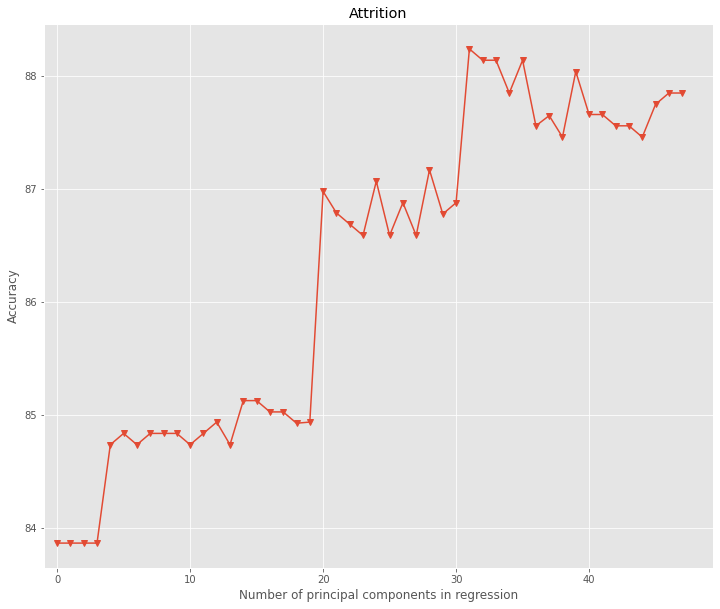

In [19]:
# Applying PCA function on training and testing set of X component
# observe optimal number of PC's on training data
n_components = 34
pca2 = PCA()
X_reduced_train = pca2.fit_transform(scale(X_train))
print(X_train.shape, X_reduced_train.shape)

n = len(X_reduced_train)
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

logR = LogisticRegression()
cv_acc_results = []

# Calculate Accuracy with only the intercept (no principal components in Log regression)
score = model_selection.cross_val_score(logR, np.ones((n,1)), y_train, cv = kf_10, scoring='accuracy')
cv_acc_results.append(round(score.mean()*100, 2))
print(cv_acc_results)

# Calculate Accuracy using CV for the all principle components, adding one component at the time.
for i in np.arange(1, len(X_train.columns)):
    score = model_selection.cross_val_score(logR, X_reduced_train[:,:i], y_train, cv=kf_10, scoring='accuracy')
    cv_acc_results.append(round(score.mean()*100, 2))
    print(i, cv_acc_results[i])
    
# Plot results 
plt.figure(figsize=(12,10))
plt.plot(cv_acc_results, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('Accuracy')
plt.title('Attrition')
plt.xlim(xmin=-1);

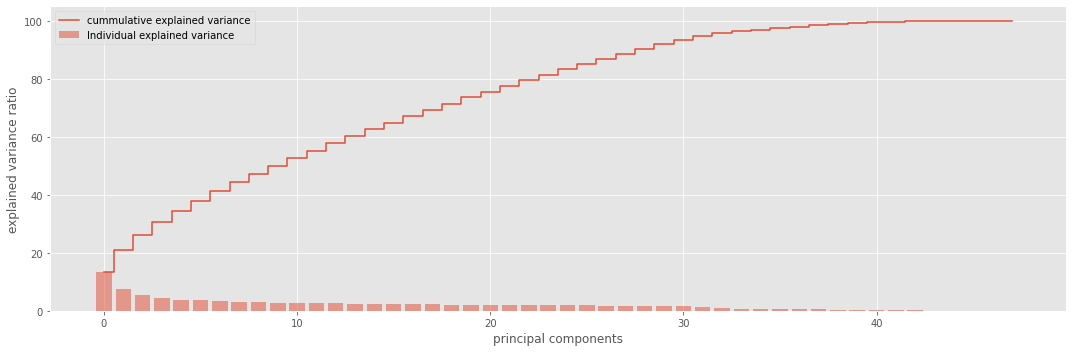

In [20]:
#training PCs explanation ratio is expected to be similar to al data explanation ratio
var_exp = np.round(pca2.explained_variance_ratio_, decimals=4)*100
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize=(15,5))
plt.bar(range(X.shape[1]),var_exp,alpha=0.5,align='center',label='Individual explained variance')
plt.step(range(X.shape[1]),cum_var_exp,where='mid',label='cummulative explained variance')
plt.ylabel("explained variance ratio")
plt.xlabel("principal components")
plt.legend(loc='best')
plt.tight_layout()
plt.show()
# notice explanatory ratio from 90-95% around 32-35 : we can choose any dimension between this

----------------- 32 ------------------
 Training Scores
Overall Accuracy - Train : 0.8862973760932945
Confusion matrix - Train : 
 [[ 71  95]
 [ 22 841]]
AUC - Train: 0.8557218445043209
- - - - Testing Scores - -
Accuracy Score: 0.8843537414965986
Confusion Matrix: 
[[363   7]
 [ 44  27]]
Area Under Curve: 0.680681385610963
Recall score: 0.38028169014084506
----------------- 33 ------------------
 Training Scores
Overall Accuracy - Train : 0.892128279883382
Confusion matrix - Train : 
 [[ 75  91]
 [ 20 843]]
AUC - Train: 0.860175347973586
- - - - Testing Scores - -
Accuracy Score: 0.891156462585034
Confusion Matrix: 
[[364   6]
 [ 42  29]]
Area Under Curve: 0.6961172440045679
Recall score: 0.4084507042253521
----------------- 34 ------------------
 Training Scores
Overall Accuracy - Train : 0.891156462585034
Confusion matrix - Train : 
 [[ 75  91]
 [ 21 842]]
AUC - Train: 0.8608873500956316
- - - - Testing Scores - -
Accuracy Score: 0.891156462585034
Confusion Matrix: 
[[363   7]
 [ 4

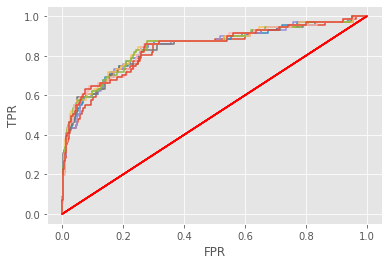

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve

for i in range(32, 40):
    n_components = i
    pca2 = PCA(n_components=n_components)
    X_reduced_train = pca2.fit_transform(scale(X_train))
    X_reduced_test = pca2.transform(scale(X_test))
    
    logR = LogisticRegression()
    logR.fit(X_reduced_train, y_train)
    
    # PRediction with training data
    y_train_pred = logR.predict(X_reduced_train)
    y_train_prob = logR.predict_proba(X_reduced_train)
    

    # Prediction with test data
    y_pred = logR.predict(X_reduced_test)
    y_test_prob = logR.predict_proba(X_reduced_test)[:,1]
    
    print("----------------- {} ------------------\n Training Scores".format(n_components))
    print('Overall Accuracy - Train :',accuracy_score(y_train , y_train_pred))
    print('Confusion matrix - Train :', '\n',confusion_matrix(y_train , y_train_pred, labels=y.unique()))
    print('AUC - Train:', roc_auc_score(y_train , y_train_prob[:,1]))
    print("- - - - Testing Scores - -".format(n_components))
    print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
    print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
    print(f'Recall score: {recall_score(y_test,y_pred)}')
    
    fpr , tpr , threshold = roc_curve(y_test , y_test_prob)
    plt.plot(fpr , tpr)
    plt.plot(fpr , fpr , 'r-')
    plt.xlabel('FPR')
    plt.ylabel('TPR')

### Training Accuracy = 88.24 when dataset is reduced from 55 to 34 PCs = n_components ~ Interpret from graph  and cv_acc_results values
### Test Accuracy = 87.302 when dataset is reduced from 55 to 34 PCs = n_components

## Classification Models: Logistic Regression and Random Forest with and without Bagging

In [45]:
def model_eval(algo , X_train , y_train , X_test , y_test):

    algo.fit(X_train , y_train)
    y_pred = algo.predict(X_train)

    y_train_pred = algo.predict(X_train)               # Finding the positives and negatives 
    y_train_prob = algo.predict_proba(X_train)[:,1]    #we are intersted only in the second column


    #overall acc of train model
    print('Confusion matrix - Train :', '\n',confusion_matrix(y_train , y_train_pred, labels=[0,1]))
    print('Overall Accuracy - Train :',accuracy_score(y_train , y_train_pred))
    print('AUC - Train:', roc_auc_score(y_train , y_train_prob))

    y_test_pred = algo.predict(X_test)
    y_test_prob = algo.predict_proba(X_test)[:,1]
    print('*'*50)
    print('Confusion matrix - Test :', '\n',confusion_matrix(y_test , y_test_pred))
    print('Overall Accuracy - Test :',accuracy_score(y_test , y_test_pred))
    print('AUC - Test:', roc_auc_score(y_test , y_test_prob))
    
    print('*'*50)
    scores=cross_val_score(algo,X,y,cv=3,scoring='roc_auc')
    print('Cross Val Scores')
    print(scores)
    print('Bias Error    :',100-scores.mean()*100)
    print('Variance Error:',scores.std()*100)
    
    print('\n')
    print('Classification Report:\n', classification_report(y_test, y_test_pred))
    
    

    fpr , tpr , threshold = roc_curve(y_test , y_test_prob)
    plt.plot(fpr , tpr)
    plt.plot(fpr , fpr , 'r-')
    plt.xlabel('FPR')
    plt.ylabel('TPR')

In [46]:
corr_d = d_dummies.corr()
high_corr_cols = corr_d[abs(corr_d['Attrition']) >= 0.1].index
corr_d.loc[high_corr_cols].sort_values(by='Attrition').style.background_gradient(cmap='coolwarm')
# We can drop WorkingYears because it is highly correlated with YearsAtCompany or vice versa ~ 
# cm = np.corrcoef(d_dummies[high_corr_cols].values.T)
# plt.figure(figsize=(40,15))
# sns.set(style="whitegrid")
# sns.heatmap(cm,annot=True, yticklabels = high_corr_cols.values, xticklabels = high_corr_cols.values, mask = np.triu(cm), cmap='coolwarm')

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,born_yyyy,BusinessTravel_Travel_Rarely,BusinessTravel_Travel_Frequently,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Medical,EducationField_Marketing,EducationField_Technical Degree,EducationField_Other,Gender_Male,JobRole_Sales Executive,JobRole_Research Scientist,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single,generation_gen_y,generation_gen_x,generation_gen_baby_boomer
TotalWorkingYears,0.680381,-0.171063,0.014515,0.004628,0.148280,-0.002693,-0.002334,-0.005533,0.782208,-0.020185,0.772893,0.026442,0.237639,0.012754,-0.020608,0.006744,0.024054,0.010136,1.000000,-0.035662,0.001008,0.628133,0.460365,0.404858,0.459188,-0.680381,0.030320,-0.012177,0.011087,-0.014781,-0.003630,0.024890,0.025779,-0.041577,-0.028935,-0.046881,-0.012241,-0.228119,-0.215426,0.064077,0.112159,0.465837,-0.207726,0.312148,0.053512,-0.089529,-0.509909,0.484399,0.217675
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,0.000544,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.509604,0.023433,-0.021557,-0.107830,0.114307,-0.008431,-0.014114,0.092698,-0.054707,-0.016724,-0.039403,0.127490,-0.387788,-0.344608,0.114896,0.115704,0.552744,-0.216559,0.414319,0.050547,-0.087072,-0.383808,0.383743,0.104813
YearsInCurrentRole,0.212901,-0.160545,0.009932,0.018845,0.060236,0.018007,-0.024106,0.008717,0.389447,-0.002305,0.363818,-0.012815,-0.090754,-0.029758,-0.001520,0.034986,-0.015123,0.050818,0.460365,-0.005738,0.049856,0.758754,1.000000,0.548056,0.714365,-0.212901,-0.009147,0.001680,-0.028151,0.046883,0.018343,-0.026418,0.025126,0.009683,-0.017021,-0.041483,0.092349,-0.131314,-0.131322,0.067877,0.054695,0.167499,-0.149751,0.136332,0.065488,-0.086486,-0.123608,0.153840,0.026931
MonthlyIncome,0.497855,-0.159840,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,0.006089,-0.027269,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079,-0.497855,0.038779,-0.031658,-0.064720,0.063978,-0.007054,0.001025,0.062576,-0.049695,-0.022279,-0.031858,0.047792,-0.345180,-0.320906,0.055684,0.068177,0.619573,-0.201514,0.485818,0.056767,-0.089361,-0.371843,0.371061,0.104059
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-1.000000,0.028791,-0.024743,0.017883,-0.027549,0.016824,-0.006354,0.038162,-0.027604,-0.041466,-0.036311,-0.002001,-0.146518,-0.143176,0.049726,0.098825,0.294248,-0.175785,0.185891,0.083919,-0.119185,-0.728347,0.657122,0.414350
generation_gen_x,0.657122,-0.158930,0.011648,-0.019102,0.121690,-0.021084,0.017268,0.039132,0.383743,-0.005721,0.371061,-0.022311,0.240605,0.013924,0.000220,-0.006409,-0.004158,0.051271,0.484399,-0.008171,0.022595,0.246378,0.153840,0.164424,0.174796,-0.657122,0.001772,-0.016636,0.026646,-0.037230,0.010802,-0.000172,0.017263,-0.034882,-0.010171,-0.023365,-0.016097,-0.139539,-0.090406,0.061897,0.072477,0.202942,-0.125072,0.157570,0.052707,-0.084416,-0.902911,1.000000,-0.171868
YearsWithCurrManager,0.202089,-0.156199,-0.026363,0.014406,0.069065,-0.004999,-0.020123,0.025976,0.375281,-0.027656,0.344079,-0.036746,-0.110319,-0.041586,-0.011985,0.02282

In [47]:
# low_corr_cols = corr_d[abs(corr['Attrition']) < 0.1].index

y = d_dummies['Attrition']
X = d_dummies[high_corr_cols].drop(['Attrition'], axis=1)
print(X.shape)
X.head(2)

(1470, 18)


,Age,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,born_yyyy,BusinessTravel_Travel_Frequently,JobRole_Sales Representative,MaritalStatus_Single,generation_gen_y,generation_gen_x
EmployeeNumber,,,,,,,,,,,,,,,,,,
1,41,2,3,2,4,5993,1,0,8,6,4,5,1974,0,0,1,0,1
2,49,3,2,2,2,5130,0,1,10,10,7,7,1966,1,0,0,0,1


In [48]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X.shape, y.shape)


(1029, 18) (441, 18) (1029,) (441,)
(1470, 18) (1470,)


Confusion matrix - Train : 
 [[854   9]
 [144  22]]
Overall Accuracy - Train : 0.8513119533527697
AUC - Train: 0.7670217370059613
**************************************************
Confusion matrix - Test : 
 [[364   6]
 [ 57  14]]
Overall Accuracy - Test : 0.8571428571428571
AUC - Test: 0.7407689379520366
**************************************************
Cross Val Scores
[0.79657519 0.75903169 0.72296652]
Bias Error    : 24.04755305060212
Variance Error: 3.0052634975970327


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       370
           1       0.70      0.20      0.31        71

    accuracy                           0.86       441
   macro avg       0.78      0.59      0.61       441
weighted avg       0.84      0.86      0.82       441



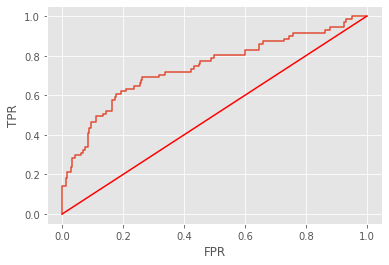

In [49]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier  

lr = LogisticRegression(fit_intercept=True)
model_eval(lr , X_train , y_train , X_test , y_test)

Confusion matrix - Train : 
 [[853  10]
 [138  28]]
Overall Accuracy - Train : 0.8561710398445093
AUC - Train: 0.7795376174454481
**************************************************
Confusion matrix - Test : 
 [[367   3]
 [ 57  14]]
Overall Accuracy - Test : 0.8639455782312925
AUC - Test: 0.7472401979444232
**************************************************
Cross Val Scores
[0.80239613 0.75798454 0.7323293 ]
Bias Error    : 23.5763343496874
Variance Error: 2.894427980286501


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       370
           1       0.82      0.20      0.32        71

    accuracy                           0.86       441
   macro avg       0.84      0.59      0.62       441
weighted avg       0.86      0.86      0.83       441



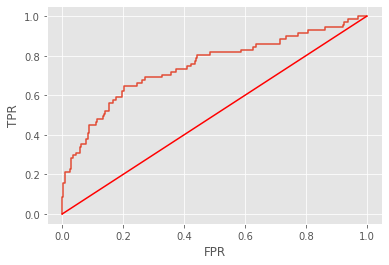

In [27]:
bagged_lr = BaggingClassifier(base_estimator = lr, n_estimators = 25, random_state = 3)
model_eval(bagged_lr , X_train , y_train , X_test , y_test)

### Feature Importance for Logistic Regression

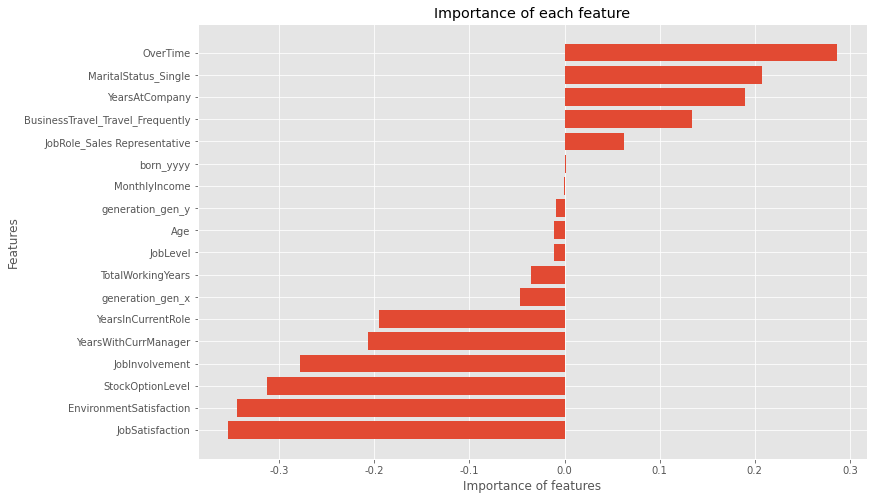

In [28]:
# get importance: in linear models the importance is given by coefficients
importances = lr.coef_[0]

names = X_train.columns
importances, names = zip(*sorted(zip(importances, names)))

# Lets plot this
plt.figure(figsize=(12,8))
plt.barh(range(len(names)), importances, align = 'center')
plt.yticks(range(len(names)), names)
plt.xlabel('Importance of features')
plt.ylabel('Features')
plt.title('Importance of each feature')
plt.show()

### inference:
We can observe that features that are inversely proportional to attrition such as high job satisfaction, Environment Satisfaction, 

Confusion matrix - Train : 
 [[863   0]
 [  0 166]]
Overall Accuracy - Train : 1.0
AUC - Train: 1.0
**************************************************
Confusion matrix - Test : 
 [[360  10]
 [ 44  27]]
Overall Accuracy - Test : 0.8775510204081632
AUC - Test: 0.8032165968785687
**************************************************
Cross Val Scores
[0.79555884 0.77356863 0.78804398]
Bias Error    : 21.42761813832682
Variance Error: 0.9126140239897612


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       370
           1       0.73      0.38      0.50        71

    accuracy                           0.88       441
   macro avg       0.81      0.68      0.72       441
weighted avg       0.87      0.88      0.86       441



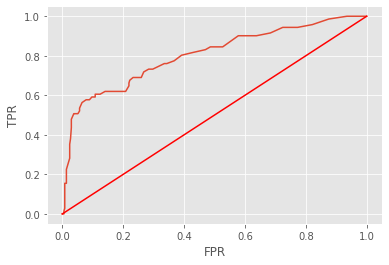

In [29]:
rfc= RandomForestClassifier()
model_eval(rfc , X_train , y_train , X_test , y_test)

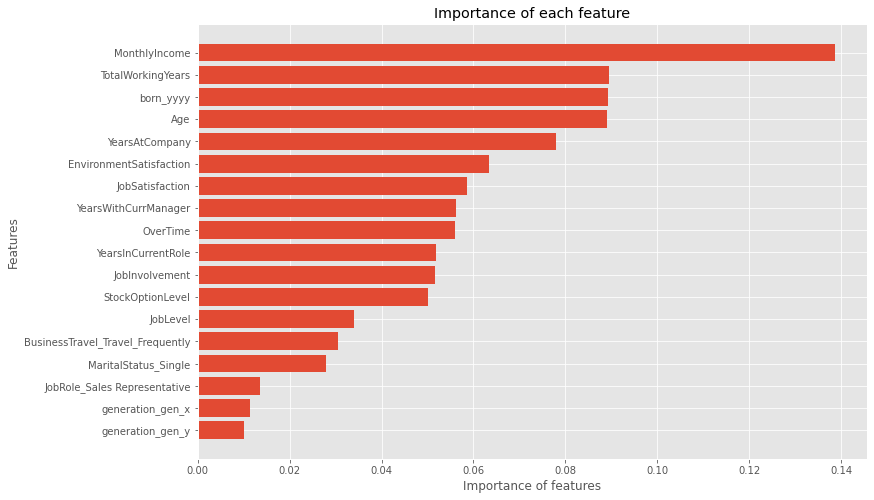

In [30]:
rfc.get_params(deep=True)
importances = rfc.feature_importances_
names = X_train.columns
importances, names = zip(*sorted(zip(importances, names)))

# Lets plot this
plt.figure(figsize=(12,8))
plt.barh(range(len(names)), importances, align = 'center')
plt.yticks(range(len(names)), names)
plt.xlabel('Importance of features')
plt.ylabel('Features')
plt.title('Importance of each feature')
plt.show()

Confusion matrix - Train : 
 [[863   0]
 [ 40 126]]
Overall Accuracy - Train : 0.9611273080660836
AUC - Train: 0.9998359602954111
**************************************************
Confusion matrix - Test : 
 [[363   7]
 [ 50  21]]
Overall Accuracy - Test : 0.8707482993197279
AUC - Test: 0.817205938332699
**************************************************
Cross Val Scores
[0.80516801 0.79069266 0.78918353]
Bias Error    : 20.498526799921976
Variance Error: 0.720583585483632


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       370
           1       0.75      0.30      0.42        71

    accuracy                           0.87       441
   macro avg       0.81      0.64      0.68       441
weighted avg       0.86      0.87      0.85       441



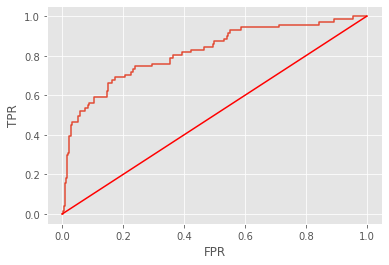

In [31]:
bagged_rfc=BaggingClassifier(base_estimator=rfc,n_estimators=100,random_state=3)
model_eval(bagged_rfc , X_train , y_train , X_test , y_test)

In [32]:
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier(random_state=3)
params = { 'n_estimators' : sp_randint(15 , 200) , 
           'max_depth' : sp_randint(2,10) , 
           'min_samples_split' : sp_randint(2,10) ,
           'min_samples_leaf' : sp_randint(1,10) ,
           'criterion' : ['gini' , 'entropy']
    
}

rsearch_rfc = RandomizedSearchCV(rfc , param_distributions= params , n_iter= 100 , cv = 3 , scoring='roc_auc' , random_state= 3 , return_train_score=True , n_jobs=-1)

rsearch_rfc.fit(X,y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=3),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018D152493C8>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018D1549EE08>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018D0FD4E608>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018D0FD4E808>},
                   random_state=3, return_train_score=True, scoring='roc_auc')

In [33]:
rsearch_rfc.best_params_   

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 8,
 'min_samples_split': 6,
 'n_estimators': 187}

Confusion matrix - Train : 
 [[853  10]
 [138  28]]
Overall Accuracy - Train : 0.8561710398445093
AUC - Train: 0.7795376174454481
**************************************************
Confusion matrix - Test : 
 [[367   3]
 [ 57  14]]
Overall Accuracy - Test : 0.8639455782312925
AUC - Test: 0.7472401979444232
**************************************************
Cross Val Scores
[0.80239613 0.75798454 0.7323293 ]
Bias Error    : 23.5763343496874
Variance Error: 2.894427980286501


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       370
           1       0.82      0.20      0.32        71

    accuracy                           0.86       441
   macro avg       0.84      0.59      0.62       441
weighted avg       0.86      0.86      0.83       441



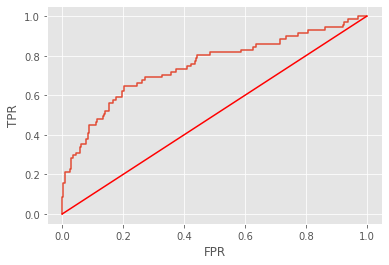

In [34]:
rfc= RandomForestClassifier(**rsearch_rfc.best_params_,random_state=3)
model_eval(bagged_lr , X_train , y_train , X_test , y_test)

In [ ]:
# Under trial : Applying results of PCs to all Classification ALgos
# Initialize classifiers in consideration
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy')))
models.append(('Random Forest', RandomForestClassifier(class_weight="balanced", n_estimators=100, criterion = 'entropy')))
# models.append(('Random Forest', RandomForestClassifier(class_weight="balanced", n_estimators=500, criterion = 'entropy')))

n_components = 34

#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)

# Evaluate each model using k-fold cross-validation:
i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
#     # accuracy scoring:
#     cv_acc_results = model_selection.cross_val_score(model, X_reduced_train[:,:n_components], y_train, cv=kfold, scoring='accuracy')
#     # roc_auc scoring:
#     cv_auc_results = model_selection.cross_val_score(model, X_reduced_train[:,:n_components], y_train, cv=kfold, scoring='roc_auc')
        # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_reduced[:,:n_components], y, cv=kfold, scoring='accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_reduced[:,:n_components], y, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)



#### Randomforest Classification

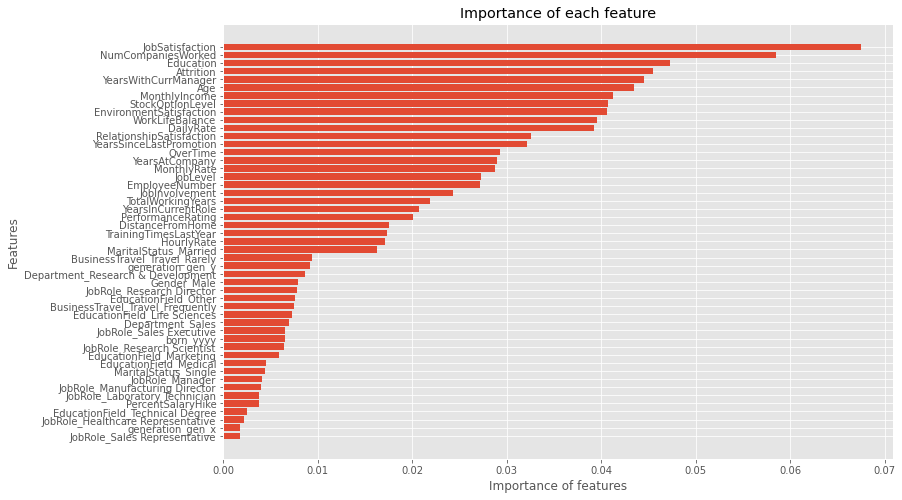

In [79]:
rf = RandomForestClassifier(class_weight="balanced", n_estimators=500) 
rf.fit(d_dummies.drop(['Attrition'],axis=1), d.Attrition)
importances = rf.feature_importances_
names = d_dummies.columns
importances, names = zip(*sorted(zip(importances, names)))

# Lets plot this
plt.figure(figsize=(12,8))
plt.barh(range(len(names)), importances, align = 'center')
plt.yticks(range(len(names)), names)
plt.xlabel('Importance of features')
plt.ylabel('Features')
plt.title('Importance of each feature')
plt.show()

#### Prediction / k-fold-CV (k=10)

In [80]:
# Make predictions using 10-K-Fold-CV

# Baseline:
print((d.Attrition.value_counts()/(d.shape[0]))*100)

# Accuracy
scores = cross_val_score(rf, d.drop(['Attrition'],axis=1), d.Attrition, cv=10, scoring='accuracy')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# ROC
scores = cross_val_score(rf, d.drop(['Attrition'],axis=1), d.Attrition, cv=10, scoring='roc_auc')
print(scores)
print("ROC_AUC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

0    83.877551
1    16.122449
Name: Attrition, dtype: float64
[nan nan nan nan nan nan nan nan nan nan]
Accuracy: nan (+/- nan)
[nan nan nan nan nan nan nan nan nan nan]
ROC_AUC: nan (+/- nan)


## Methodologies that we've learned
 - random forest (done)
 - Derrick: logistic regression >> right fit to purpose
 - Mansi: PCR >> good plus alpha

#### Point.
  - First. Done Perfectly with Logistic Regression
  - First. Done Perfectly with PCR
  - Second. Other models (linear regression / k-nn / svm / decision tree)